In [1]:
import tensorflow as tf
import numpy as np
import utility
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Fetch training data
master_train_labels, master_train_images = utility.read_mnist_normalized()
master_test_labels, master_test_images = utility.read_mnist_normalized('testing')

In [3]:
# Study the shapes
print(master_train_labels.shape)
print(master_train_images.shape)
print(master_test_labels.shape)
print(master_test_images.shape)

(60000, 10)
(60000, 784)
(10000, 10)
(10000, 784)


[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


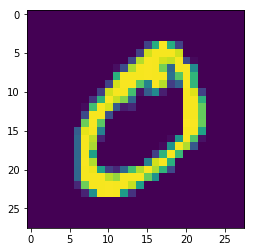

In [4]:
plt.imshow(master_train_images[1].reshape(28, 28))
print(master_train_labels[1])

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]


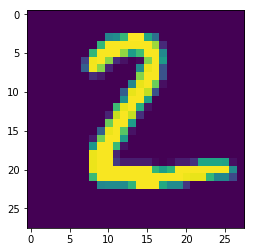

In [5]:
plt.imshow(master_test_images[1].reshape(28, 28))
print(master_test_labels[1])

In [6]:
n_features = 784  # MNIST data input (img shape: 28*28)
n_classes = 10  # MNIST total classes (0-9 digits)

In [7]:
# This is the data
train_features = master_train_images
test_features = master_test_images
train_labels = master_train_labels.astype(np.float32)
test_labels = master_test_labels.astype(np.float32)

In [8]:
# The computational graph
features = tf.placeholder(tf.float32, [None, n_features])
classes = tf.placeholder(tf.float32, [None, n_classes])
weights = tf.Variable(tf.random_normal([n_features, n_classes]))
bias = tf.Variable(tf.random_normal([n_classes]))

In [9]:
logits = tf.add(tf.matmul(features, weights), bias)
learning_rate = tf.placeholder(tf.float32)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=classes))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(classes, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
def print_epoch_stats(epoch_i, sess, last_features, last_labels):
    """
    Print cost and validation accuracy of an epoch
    """
    current_cost = sess.run(
        cost,
        feed_dict={features: last_features, classes: last_labels})
    valid_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, classes: test_labels})
    print('Epoch: {:<4} - Cost: {:<8.3} Test Accuracy: {:<5.3}'.format(
        epoch_i,
        current_cost,
        valid_accuracy))

In [26]:

init = tf.global_variables_initializer()

batch_size = 128
epochs = 500
learn_rate = 0.001

train_batches = utility.batches(batch_size, train_features, train_labels)

with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch_i in range(epochs):

        # Loop over all batches
        for batch_features, batch_labels in train_batches:
            train_feed_dict = {
                features: batch_features,
                classes: batch_labels,
                learning_rate: learn_rate}
            sess.run(optimizer, feed_dict=train_feed_dict)

        # Print cost and validation accuracy of an epoch
        print_epoch_stats(epoch_i, sess, batch_features, batch_labels)

    # Calculate accuracy for test dataset
    test_accuracy = sess.run(
        accuracy,
        feed_dict={features: test_features, classes: test_labels})

print('Test Accuracy: {}'.format(test_accuracy))

Epoch: 0    - Cost: 9.14     Test Accuracy: 0.202
Epoch: 1    - Cost: 8.57     Test Accuracy: 0.212
Epoch: 2    - Cost: 8.1      Test Accuracy: 0.22 
Epoch: 3    - Cost: 7.66     Test Accuracy: 0.23 
Epoch: 4    - Cost: 7.25     Test Accuracy: 0.24 
Epoch: 5    - Cost: 6.87     Test Accuracy: 0.252
Epoch: 6    - Cost: 6.52     Test Accuracy: 0.264
Epoch: 7    - Cost: 6.21     Test Accuracy: 0.277
Epoch: 8    - Cost: 5.94     Test Accuracy: 0.293
Epoch: 9    - Cost: 5.69     Test Accuracy: 0.308
Epoch: 10   - Cost: 5.46     Test Accuracy: 0.324
Epoch: 11   - Cost: 5.25     Test Accuracy: 0.338
Epoch: 12   - Cost: 5.06     Test Accuracy: 0.351
Epoch: 13   - Cost: 4.88     Test Accuracy: 0.366
Epoch: 14   - Cost: 4.71     Test Accuracy: 0.378
Epoch: 15   - Cost: 4.55     Test Accuracy: 0.39 
Epoch: 16   - Cost: 4.41     Test Accuracy: 0.401
Epoch: 17   - Cost: 4.28     Test Accuracy: 0.413
Epoch: 18   - Cost: 4.15     Test Accuracy: 0.425
Epoch: 19   - Cost: 4.04     Test Accuracy: 0.435


Epoch: 164  - Cost: 1.18     Test Accuracy: 0.792
Epoch: 165  - Cost: 1.18     Test Accuracy: 0.793
Epoch: 166  - Cost: 1.18     Test Accuracy: 0.793
Epoch: 167  - Cost: 1.17     Test Accuracy: 0.794
Epoch: 168  - Cost: 1.17     Test Accuracy: 0.794
Epoch: 169  - Cost: 1.17     Test Accuracy: 0.795
Epoch: 170  - Cost: 1.17     Test Accuracy: 0.795
Epoch: 171  - Cost: 1.16     Test Accuracy: 0.796
Epoch: 172  - Cost: 1.16     Test Accuracy: 0.797
Epoch: 173  - Cost: 1.16     Test Accuracy: 0.797
Epoch: 174  - Cost: 1.15     Test Accuracy: 0.798
Epoch: 175  - Cost: 1.15     Test Accuracy: 0.798
Epoch: 176  - Cost: 1.15     Test Accuracy: 0.799
Epoch: 177  - Cost: 1.14     Test Accuracy: 0.799
Epoch: 178  - Cost: 1.14     Test Accuracy: 0.799
Epoch: 179  - Cost: 1.14     Test Accuracy: 0.801
Epoch: 180  - Cost: 1.14     Test Accuracy: 0.801
Epoch: 181  - Cost: 1.13     Test Accuracy: 0.802
Epoch: 182  - Cost: 1.13     Test Accuracy: 0.802
Epoch: 183  - Cost: 1.13     Test Accuracy: 0.803


Epoch: 328  - Cost: 0.894    Test Accuracy: 0.84 
Epoch: 329  - Cost: 0.893    Test Accuracy: 0.84 
Epoch: 330  - Cost: 0.892    Test Accuracy: 0.84 
Epoch: 331  - Cost: 0.891    Test Accuracy: 0.841
Epoch: 332  - Cost: 0.89     Test Accuracy: 0.841
Epoch: 333  - Cost: 0.889    Test Accuracy: 0.841
Epoch: 334  - Cost: 0.888    Test Accuracy: 0.841
Epoch: 335  - Cost: 0.887    Test Accuracy: 0.841
Epoch: 336  - Cost: 0.886    Test Accuracy: 0.841
Epoch: 337  - Cost: 0.885    Test Accuracy: 0.841
Epoch: 338  - Cost: 0.884    Test Accuracy: 0.841
Epoch: 339  - Cost: 0.883    Test Accuracy: 0.842
Epoch: 340  - Cost: 0.882    Test Accuracy: 0.842
Epoch: 341  - Cost: 0.881    Test Accuracy: 0.842
Epoch: 342  - Cost: 0.88     Test Accuracy: 0.842
Epoch: 343  - Cost: 0.88     Test Accuracy: 0.842
Epoch: 344  - Cost: 0.879    Test Accuracy: 0.842
Epoch: 345  - Cost: 0.878    Test Accuracy: 0.843
Epoch: 346  - Cost: 0.877    Test Accuracy: 0.843
Epoch: 347  - Cost: 0.876    Test Accuracy: 0.843


Epoch: 492  - Cost: 0.771    Test Accuracy: 0.858
Epoch: 493  - Cost: 0.771    Test Accuracy: 0.858
Epoch: 494  - Cost: 0.77     Test Accuracy: 0.858
Epoch: 495  - Cost: 0.77     Test Accuracy: 0.858
Epoch: 496  - Cost: 0.769    Test Accuracy: 0.858
Epoch: 497  - Cost: 0.768    Test Accuracy: 0.858
Epoch: 498  - Cost: 0.768    Test Accuracy: 0.858
Epoch: 499  - Cost: 0.767    Test Accuracy: 0.858
Test Accuracy: 0.8584001064300537
